# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.datasets import mnist, boston_housing, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
 boston_housing = tf.keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order] 

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
1,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
2,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
3,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99
4,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56


In [4]:
train_labels[:10]

array([15.7, 21.4, 30.8, 19.5, 39.8, 17.1, 18.1, 25. , 50. , 23.9])

In [5]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

pd.DataFrame(train_data, columns=column_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.363816,-0.483615,2.138151,-0.256833,0.201831,-0.922660,0.952816,-0.977990,-0.856463,-1.311311,0.283943,0.047948,2.003873
1,0.443610,-0.483615,1.028326,-0.256833,0.833511,-0.081931,-0.129386,-0.383129,1.675886,1.565287,0.784476,0.448077,0.066135
2,-0.402792,2.675839,-1.198675,-0.256833,-1.104211,0.462568,-1.691770,0.819070,-0.741356,-0.926159,-0.080081,0.434566,-1.162204
3,0.315280,-0.483615,1.028326,-0.256833,1.328612,0.070416,0.501302,-0.496065,1.675886,1.565287,0.784476,0.448077,0.172407
4,-0.398647,-0.483615,-1.270703,-0.256833,-0.592038,2.112992,0.512052,-0.492810,-0.741356,-1.281221,-0.307596,0.433821,-0.715033


In [6]:
activation_f_list = ['linear', 'tanh', 'relu', 'exponential', 'hard_sigmoid', 'sigmoid', 'softsign', 'softplus', 'selu', 'softmax', 'elu', ]
loss_f_list=['mse']
optimizer_f_list=['rmsprop', 'adam', 'sgd']
metrics_f_list=['mae']

In [19]:
def build_model(train_data,
                name_model='model',
                num_neurons=64,
                num_layers=1,
                activation_f_list=['linear', 'tanh', 'relu', 'hard_sigmoid',
                                   'sigmoid', 'softsign'],
                loss_f_list=['mse'],
                optimizer_f_list=['rmsprop', 'adam', 'sgd'],
                metrics_f_list=['mae']):
        
    model = Sequential(name=name_model)
    model.add(Dense(num_neurons,
                    activation=np.random.choice(activation_f_list),
                    input_shape=(train_data.shape[1],))) 
    
    for k in range(num_layers):
        model.add(Dense(abs(num_neurons-2*k),
                        activation=np.random.choice(activation_f_list))) 

    model.add(Dense(1)) 

    model.compile(loss=np.random.choice(loss_f_list),
                  optimizer=np.random.choice(optimizer_f_list), 
                  metrics=np.random.choice(metrics_f_list))
    return model


In [20]:
models_dict = {'model_names': [], 'models':[], 'model_historys':[]}
for _ in range(15):   
    models_dict['model_names'].append(f'model_{_}')
    models_dict['models'].append(build_model(train_data=train_data,
                                             name_model=f'model_{_}',
                                             num_layers=np.random.randint(15)
                                            )
                                )
    


In [21]:
for model in models_dict['models']:
    model.summary()

Model: "model_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_121 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_122 (Dense)            (None, 62)                4030      
_________________________________________________________________
dense_123 (Dense)            (None, 60)                3780      
_________________________________________________________________
dense_124 (Dense)            (None, 58)                3538      
_________________________________________________________________
dense_125 (Dense)            (None, 56)                3304      
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 57  

In [22]:
for model in models_dict['models']:
    models_dict['model_historys'].append(model.fit(train_data,
                                                   train_labels,
                                                   epochs=300,
                                                   validation_split=0.2,
                                                   verbose=0)
                                        )



In [23]:
def plot_history(history):
    keys_list = list(history.history.keys())
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, 
           np.array(history.history[keys_list[1]]),
           label='train Loss')
    plt.plot(history.epoch, 
           np.array(history.history[keys_list[-1]]),
           label = 'val loss')
    plt.legend()
    #plt.ylim([0, 5])
    plt.show()



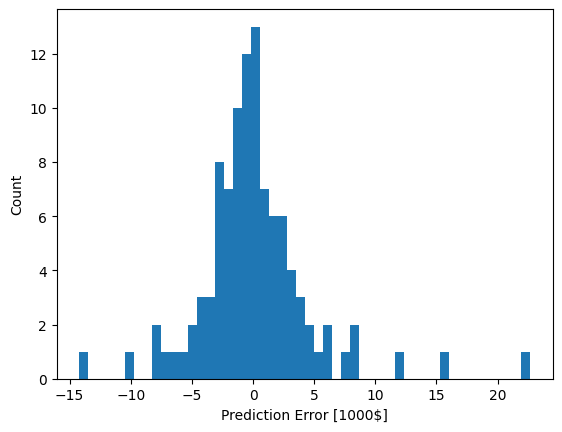

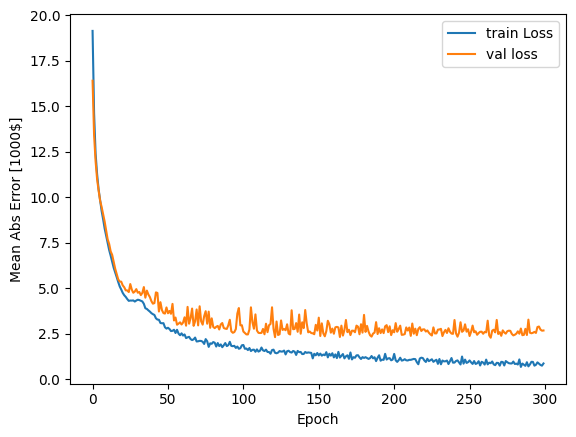

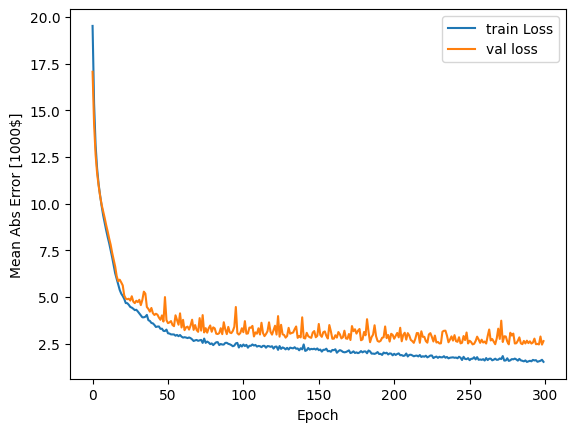

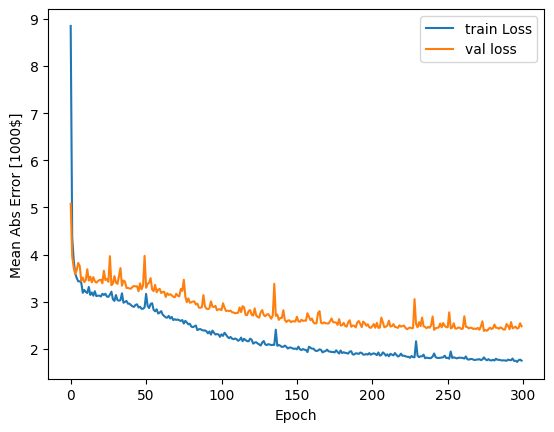

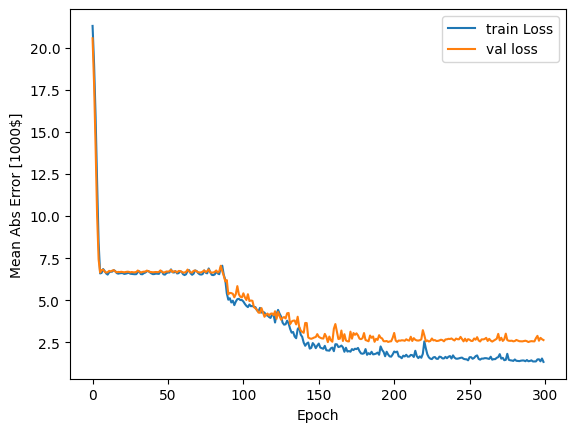

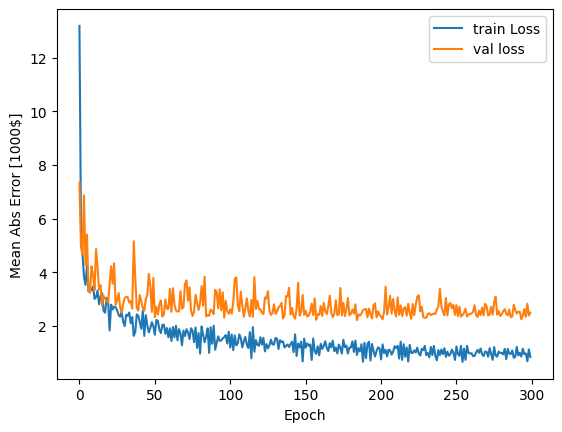

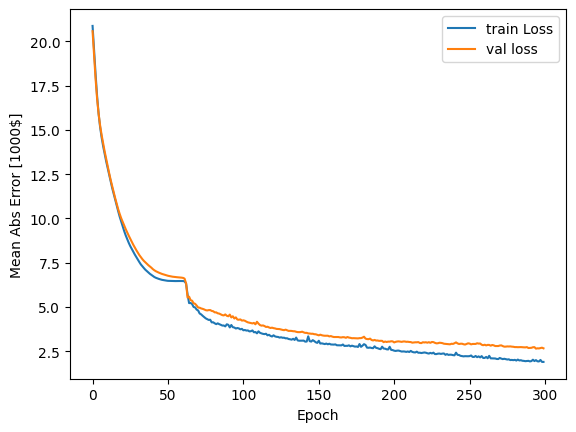

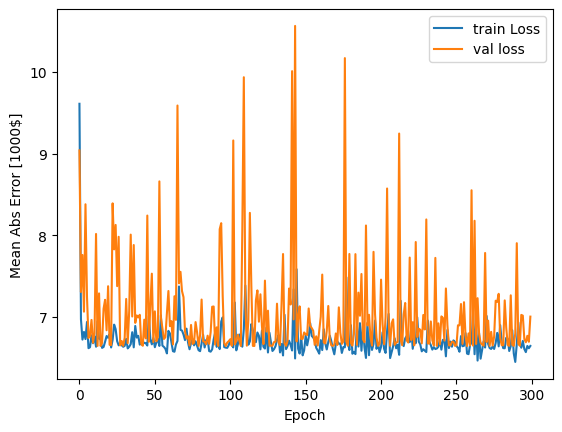

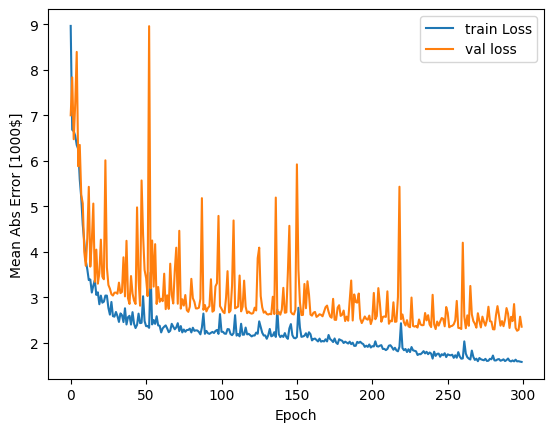

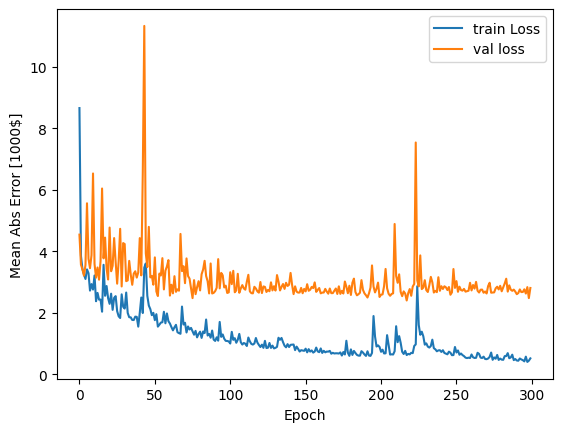

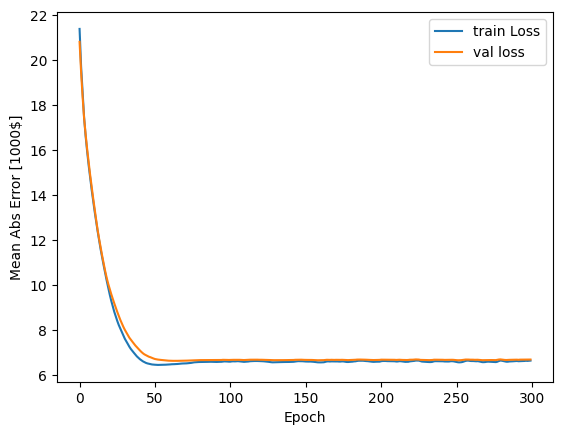

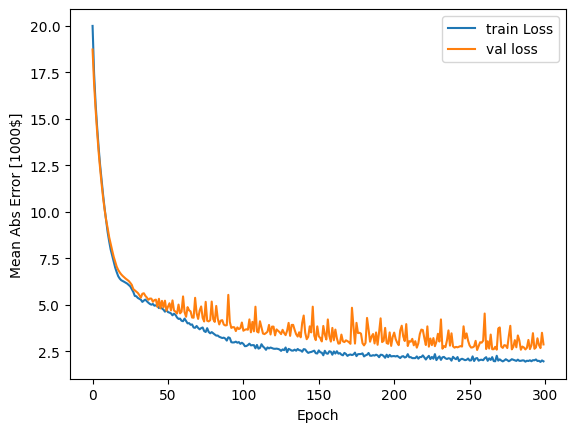

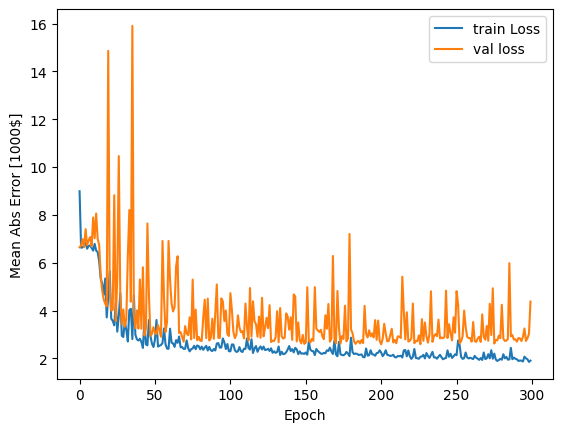

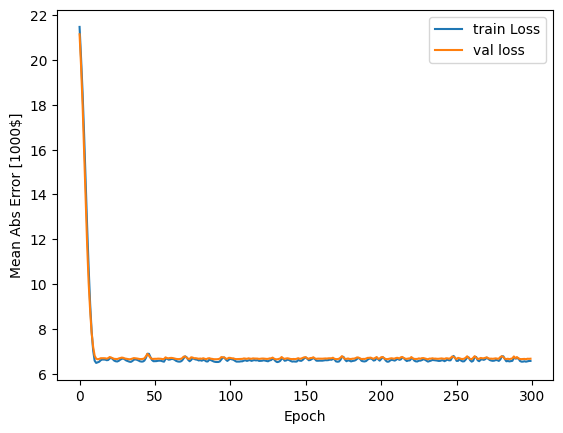

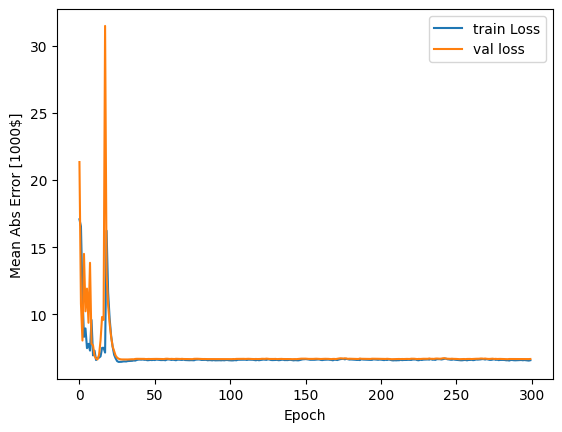

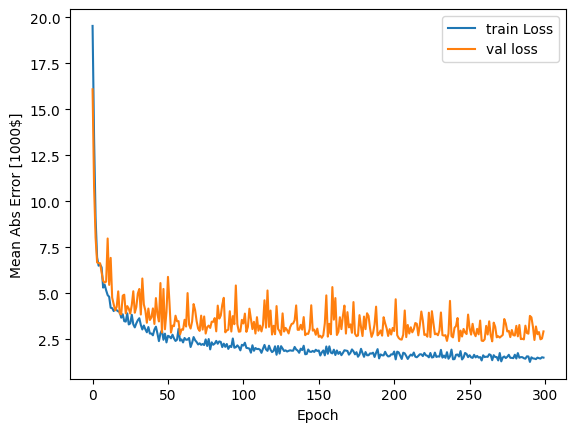

In [24]:
for history in models_dict['model_historys']:
    #keys_list = list(history.history.keys())
    #print(keys_list)
    plot_history(history)

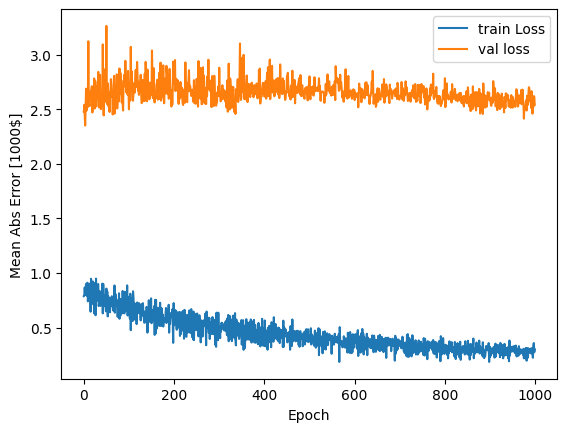

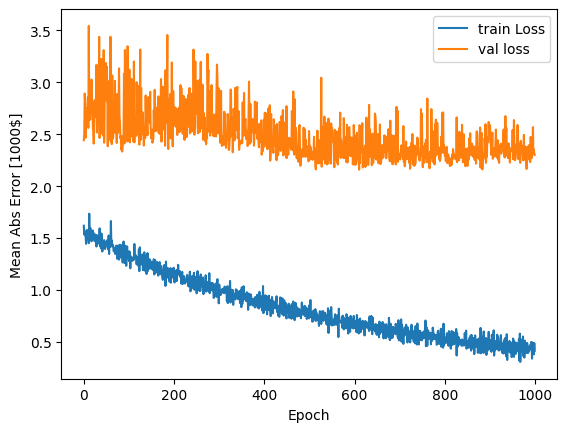

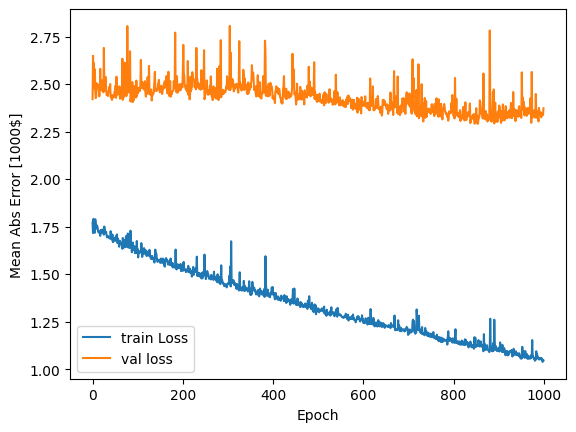

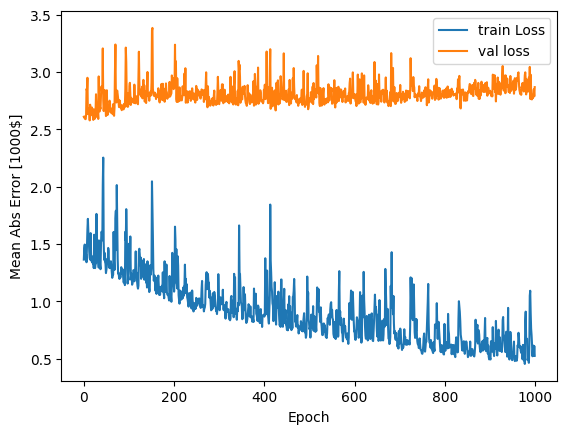

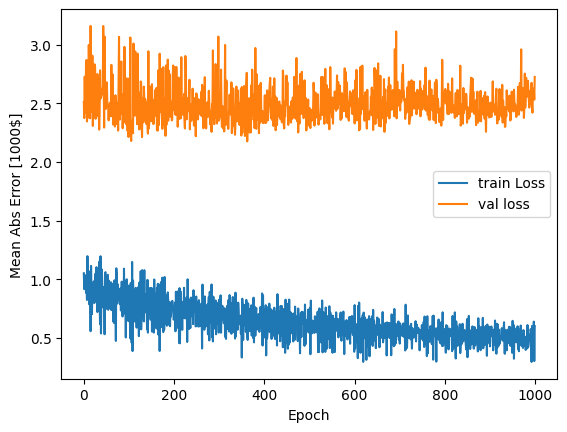

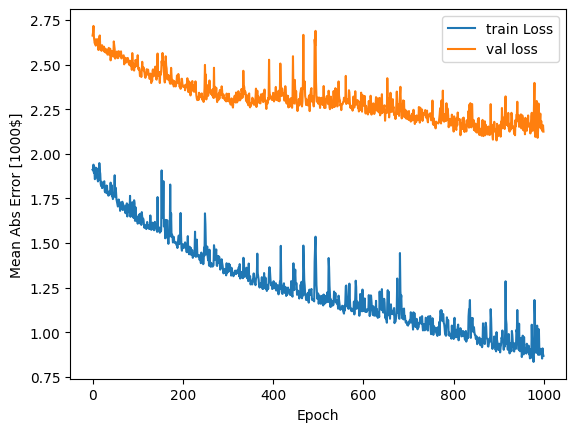

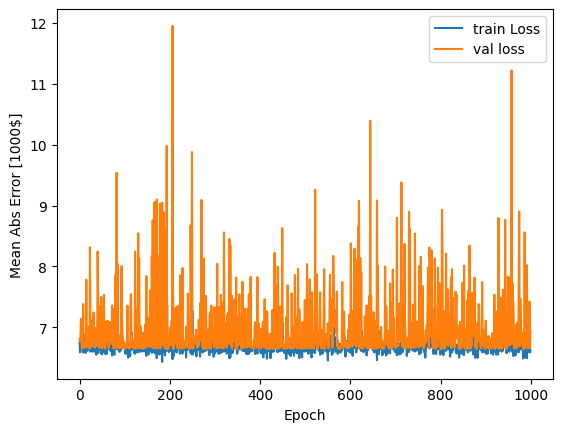

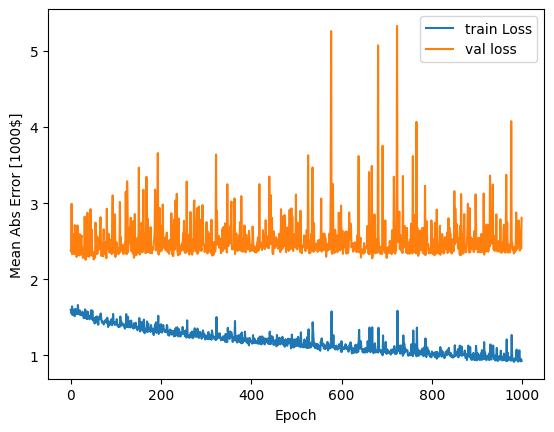

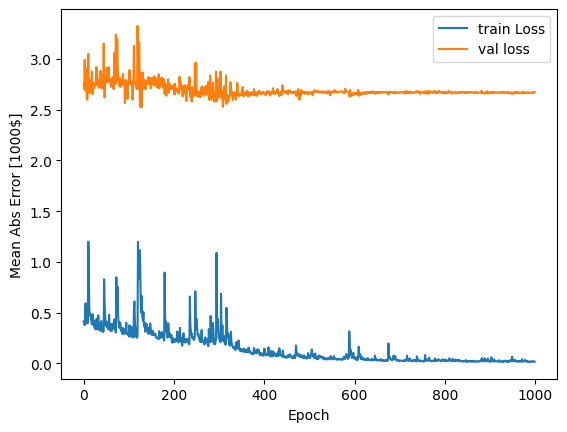

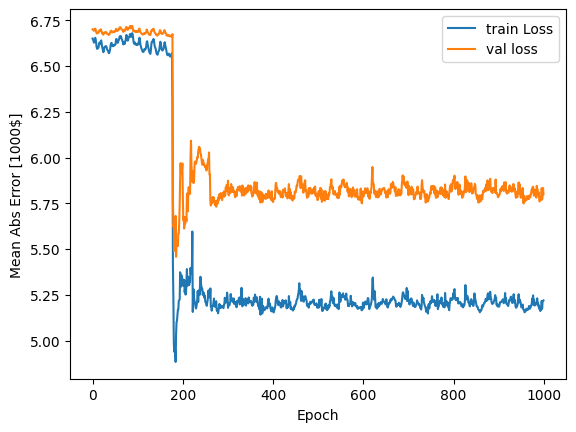

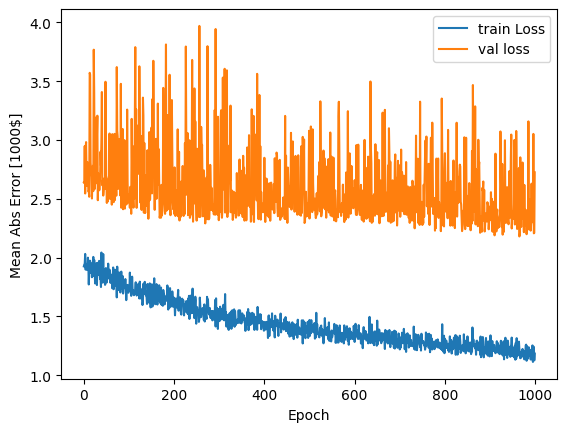

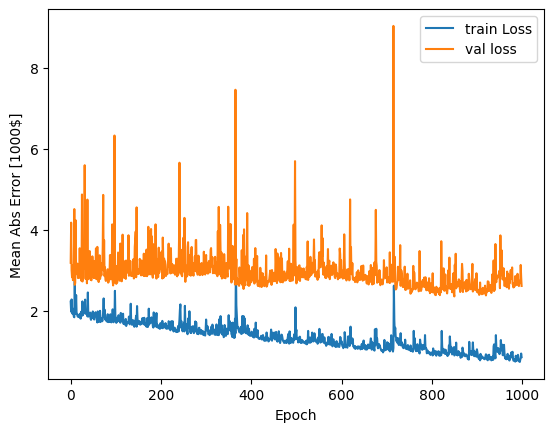

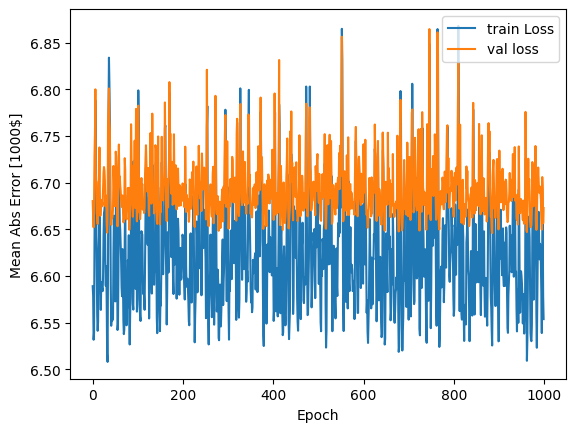

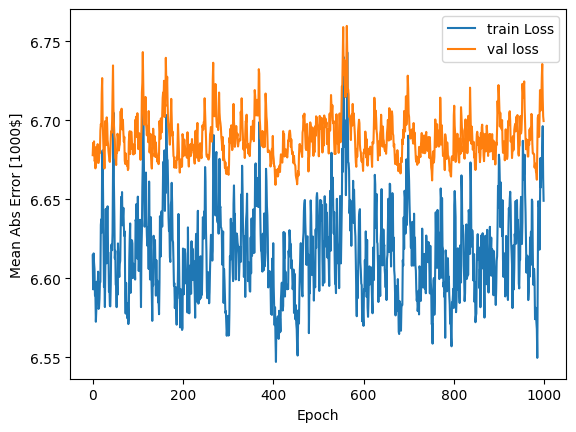

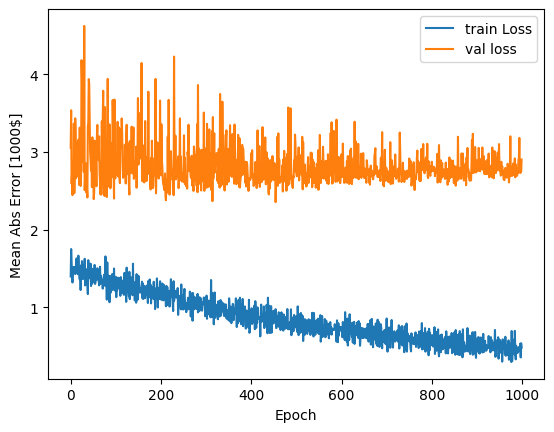

In [27]:
for model in models_dict['models']:

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=20)

    history = model.fit(train_data, train_labels, epochs=1000,
                        validation_split=0.2, verbose=0,)

    plot_history(history)

In [28]:
for model in models_dict['models']:
    [loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

    print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))


Testing set Mean Abs Error: $2767.63
Testing set Mean Abs Error: $2848.88
Testing set Mean Abs Error: $2461.39
Testing set Mean Abs Error: $2637.29
Testing set Mean Abs Error: $2598.43
Testing set Mean Abs Error: $2253.78
Testing set Mean Abs Error: $6697.43
Testing set Mean Abs Error: $3226.75
Testing set Mean Abs Error: $2616.18
Testing set Mean Abs Error: $5737.22
Testing set Mean Abs Error: $2787.09
Testing set Mean Abs Error: $2823.17
Testing set Mean Abs Error: $6516.79
Testing set Mean Abs Error: $6535.15
Testing set Mean Abs Error: $2995.91


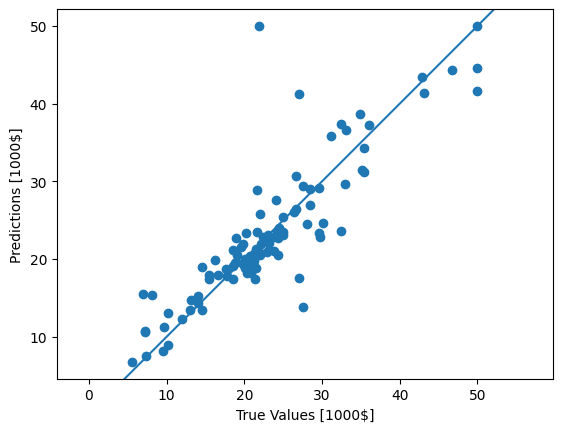

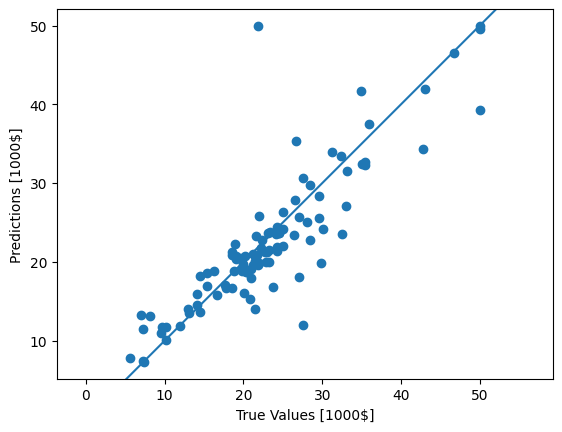

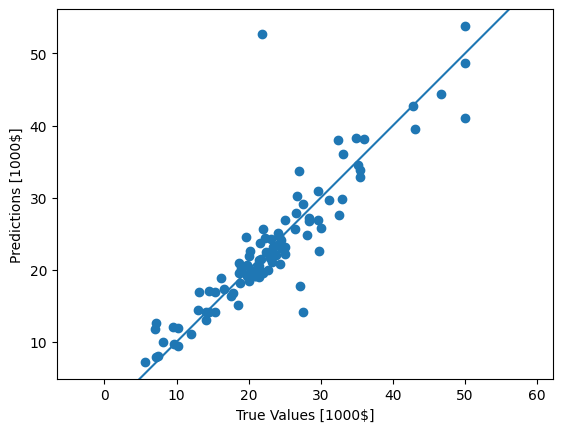

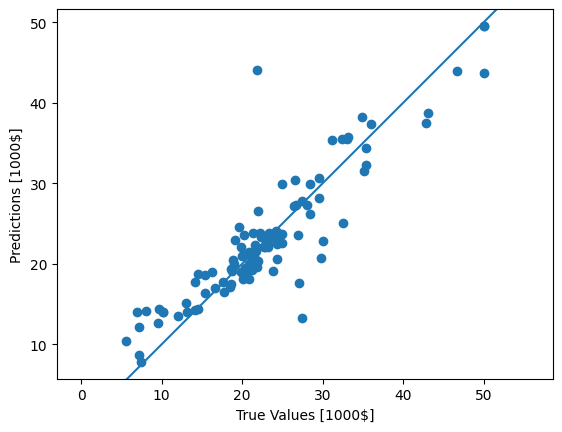

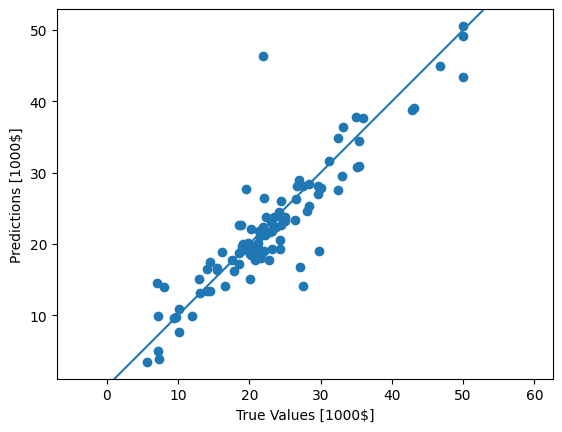

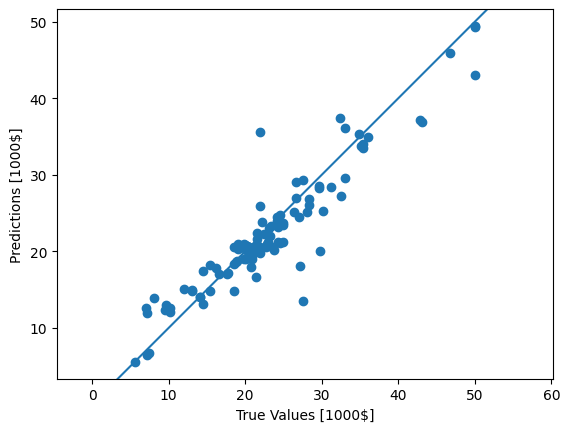

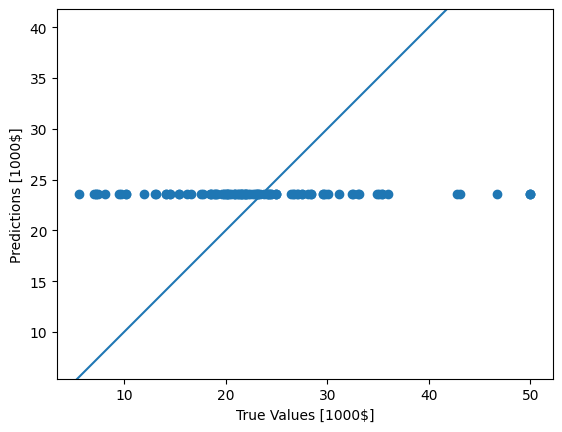

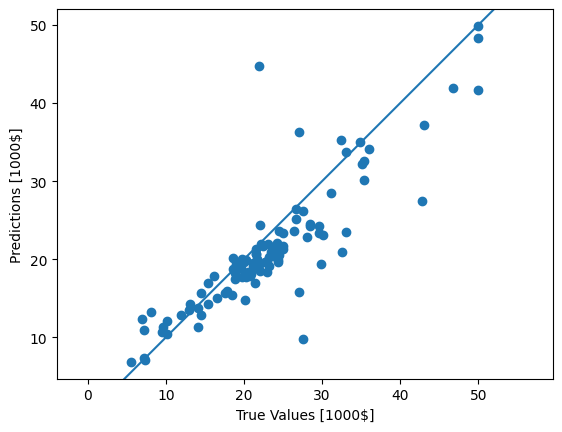

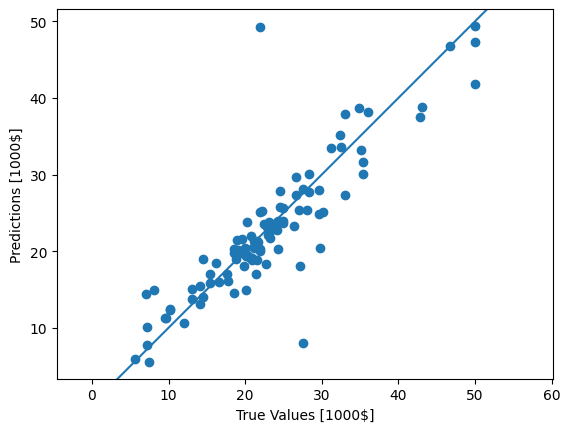

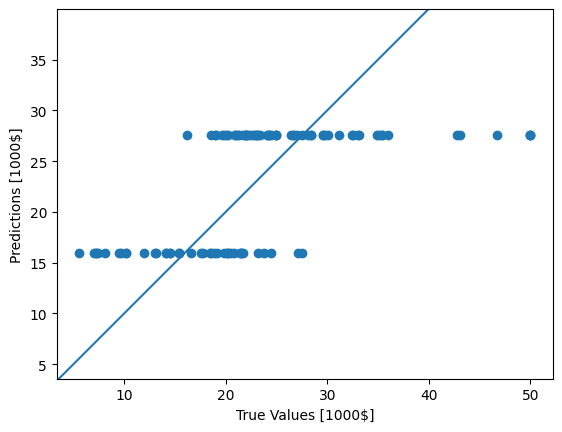

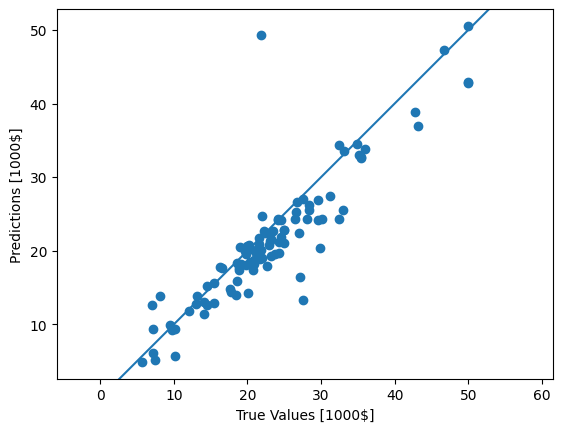

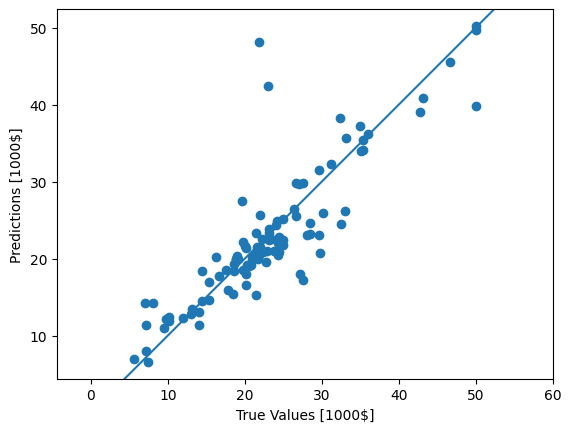

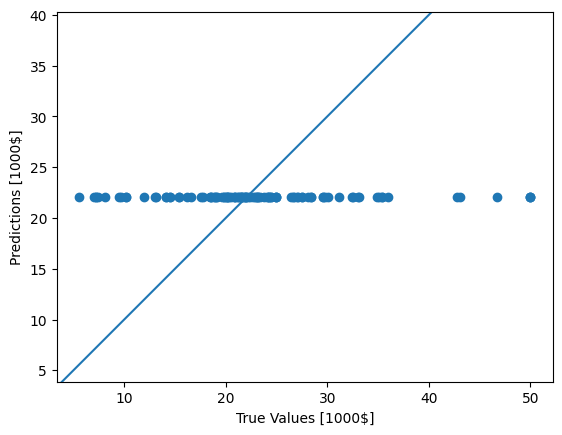

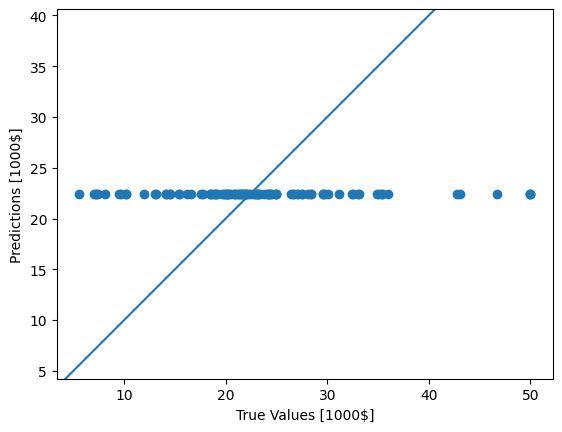

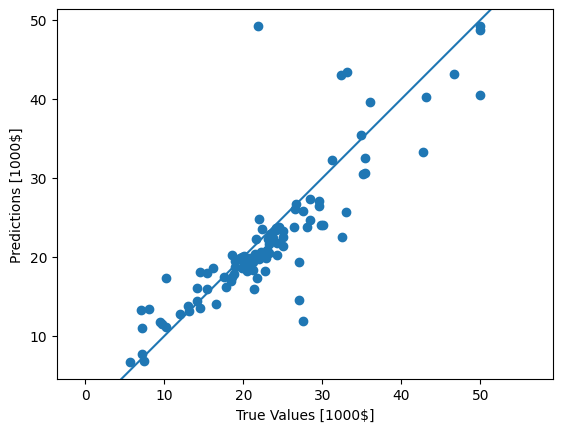

In [34]:
models_dict['test_predictions']=[]
for model in models_dict['models']:
    test_predictions = model.predict(test_data).flatten()
    models_dict['test_predictions'].append(test_predictions)
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [1000$]')
    plt.ylabel('Predictions [1000$]')
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    _ = plt.plot([-100, 100], [-100, 100])
    plt.show()
    

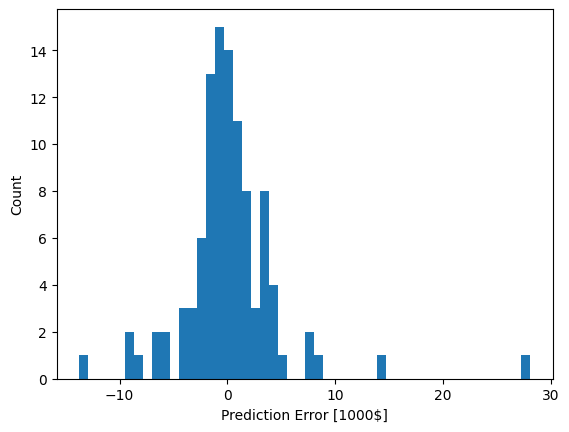

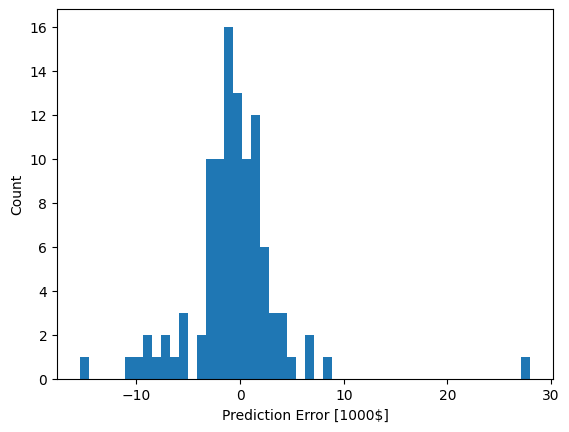

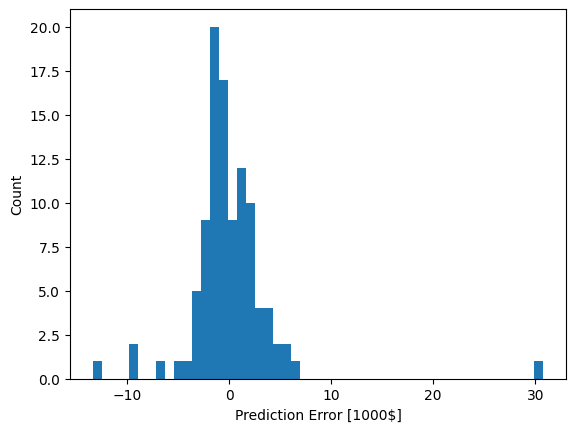

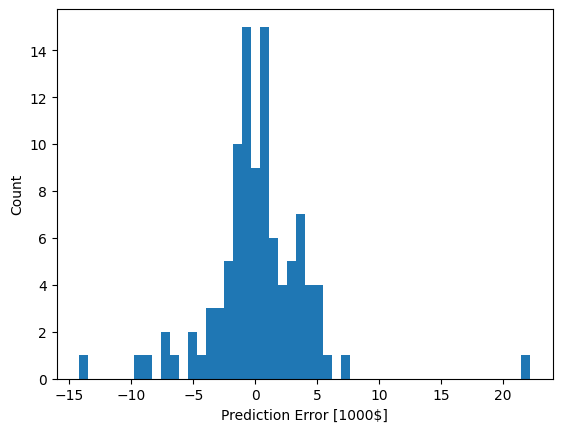

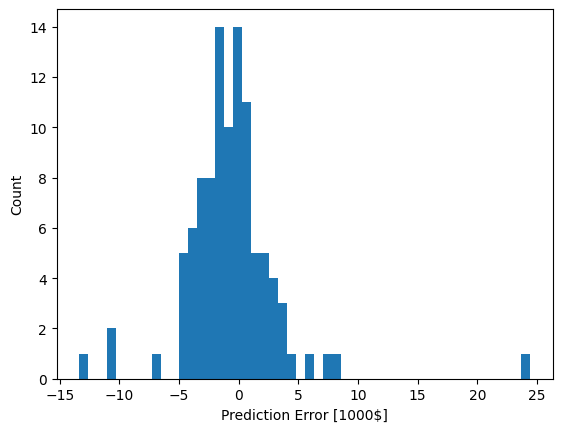

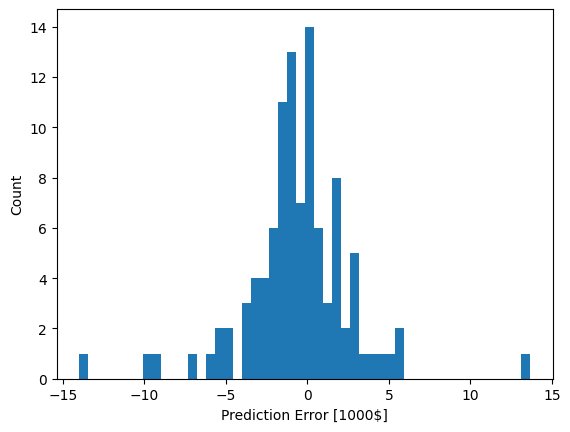

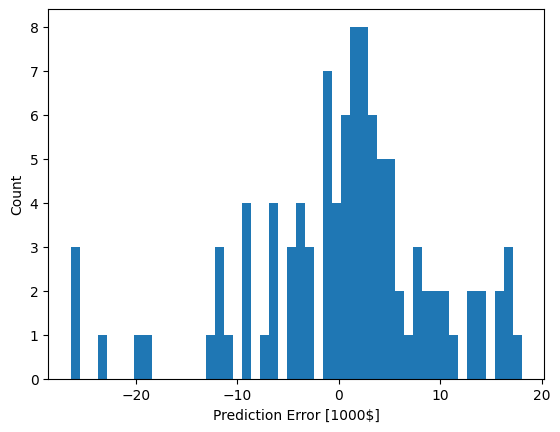

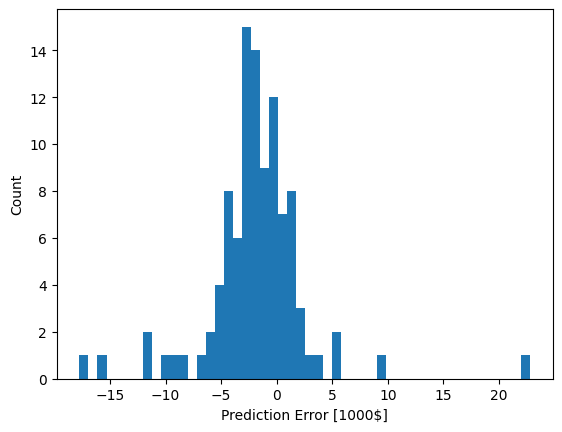

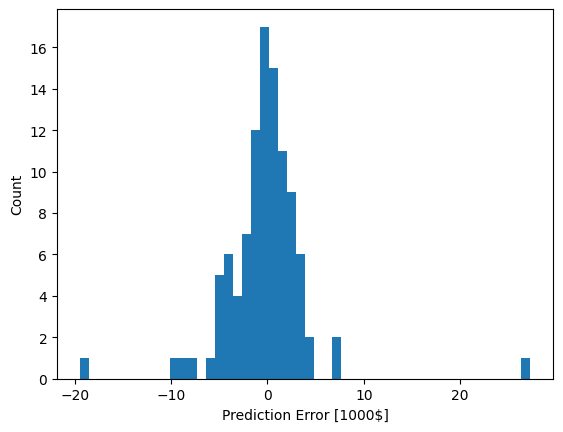

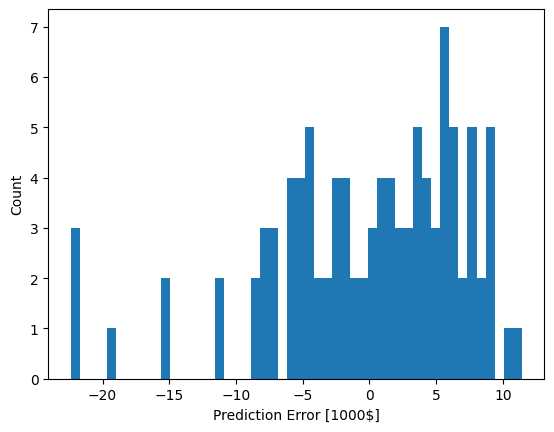

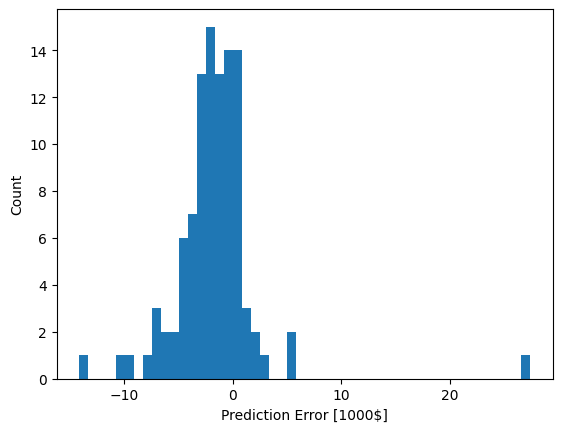

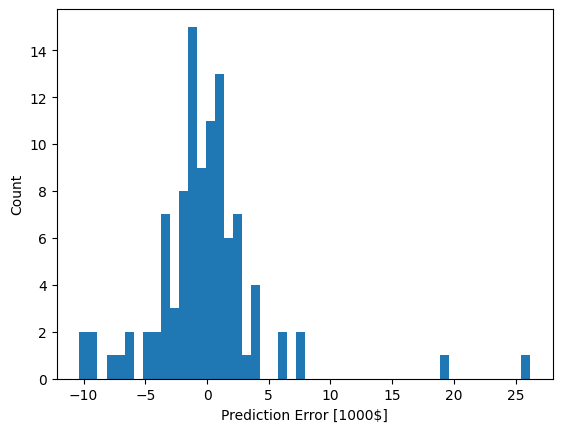

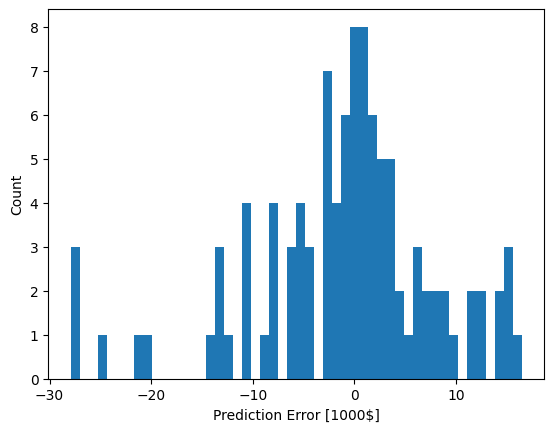

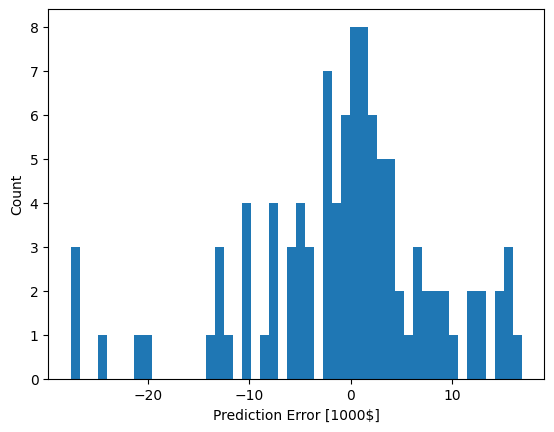

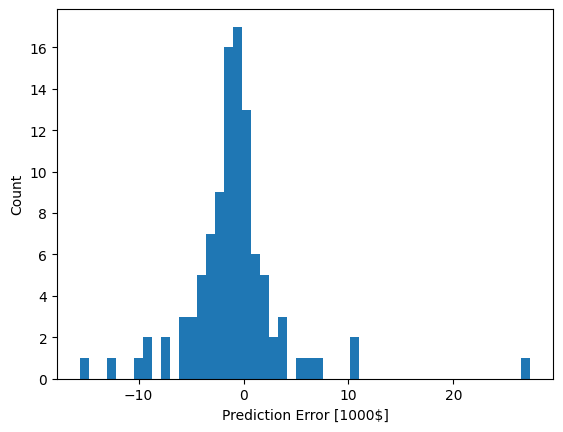

In [36]:
models_dict['errors']=[]
for test_predictions in models_dict['test_predictions']:
    error = test_predictions - test_labels
    models_dict['errors'].append(error)
    plt.hist(error, bins = 50)
    plt.xlabel("Prediction Error [1000$]")
    _ = plt.ylabel("Count")
    plt.show()